## Instalação de Bibliotecas ##

In [1]:
!pip install numpy
!pip install numpy
!pip install pyswmm
!pip install joblib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.1/531.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.6/165.6 kB 7.2 MB/s eta 0:00:00
  Created wheel for julian: filename=julian-0.14-py3-none-any.whl size=2613 sha256=63950a125b90e6315fe06dc0b44ce311052ef0cbe89b020caa48da27312a7c88
  Stored in directory: /root/.cache/pip/wheels/6b/8b/6f/f2610e040b0950d56996c5bfb542e53dbf58e0d99b2a14814c
Successfully built julian


## Criando os arquivos .inp para cada conjunto de valores do coeficiente de perda localizada K ##

In [2]:
import numpy
import glob
import shutil
import os
from random import seed
from random import random
import numpy as np
from numpy import average, matrix


# Read base file to change parameters
with open("junction_inp_0.inp",'r') as f:
    get_all=f.readlines()

dk = 0.1 # intervalo de valores do coef. de perda local
cont = 0 # contador de arquivos
nk = 2 # numero de valores do coef. de perda local em cada direcao

for i in range(nk):
    ############################################## OBS: colocar 20 para os resultados finais
    kUp = i*dk
    for j in range(nk):
        kLat = j*dk
        for k in range(nk):
            kDw = k*dk
            cont = cont + 1
            print(cont, kLat,kDw,kUp)
            shutil.copy("junction_inp_0.inp", os.path.join(f"junction_inp_{cont}.inp"))
            shutil.copy("junction_ini_0.ini", os.path.join(f"junction_ini_{cont}.ini"))
            file_name = f"junction_inp_{cont}.inp"
            print(file_name)
            with open('K_value.txt','a') as res:
                out_arr = numpy.hstack((kUp,kLat,kDw))
                res.write(str(file_name)+ "   "+str(out_arr) + '\n')

            with open(file_name,'w') as f:
                for iw,line in enumerate(get_all,1):         ## STARTS THE NUMBERING FROM 1 (by default it begins with 0)
                    if iw == 96:                              ## OVERWRITES line:96
                        f.writelines("L_PC             0          " + str("{:.1f}".format(kLat)) + "        0          NO         0         \n")
                    elif iw == 97:                              ## OVERWRITES line:97
                        f.writelines("U_PC             0          " + str("{:.1f}".format(kUp)) + "        0          NO         0         \n")
                    elif iw == 98:                              ## OVERWRITES line:98
                        f.writelines("D_PC             " + str("{:.1f}".format(kDw)) + "        0          0          NO         0         \n")
                    else:
                        f.writelines(line)



1 0.0 0.0 0.0
junction_inp_1.inp
2 0.0 0.1 0.0
junction_inp_2.inp
3 0.1 0.0 0.0
junction_inp_3.inp
4 0.1 0.1 0.0
junction_inp_4.inp
5 0.0 0.0 0.1
junction_inp_5.inp
6 0.0 0.1 0.1
junction_inp_6.inp
7 0.1 0.0 0.1
junction_inp_7.inp
8 0.1 0.1 0.1
junction_inp_8.inp


## Execução das simulações ##

In [3]:
from pyswmm import Simulation
import re
from joblib import Parallel, delayed
import time

tempo_inicial = time.time()

list_of_files = glob.glob('*.inp') # files .inp to be readed
# print(list_of_files)

def run_swmm_parallel(file_name):
    with Simulation(file_name, outputfile= str(file_name) + '.out' , reportfile= str(file_name) + '.rpt') as sim:
        for step in sim:
            pass
    return file_name

resultado = Parallel(n_jobs=4)(delayed(run_swmm_parallel)(file_name) for file_name in list_of_files)

# print(resultado)
print(f"Demorou: {time.time() - tempo_inicial}")
f = open('output.txt', 'w')
print(f"Demorou: {time.time() - tempo_inicial}", file = f)
print(resultado, file=f)

Demorou: 15.848103046417236


## Processamento dos Resultados ##

junction_inp_6.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01908826]])]


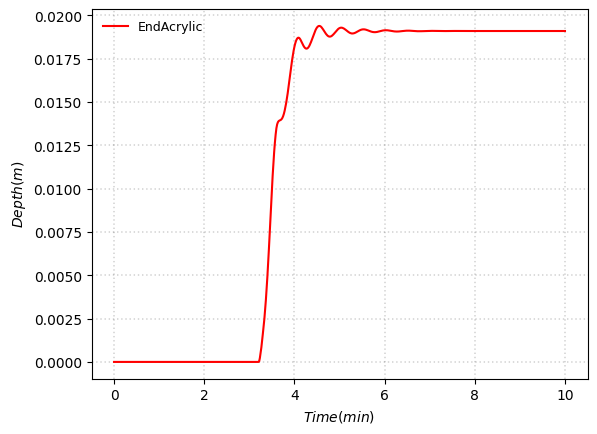

junction_inp_8.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01908825]])]


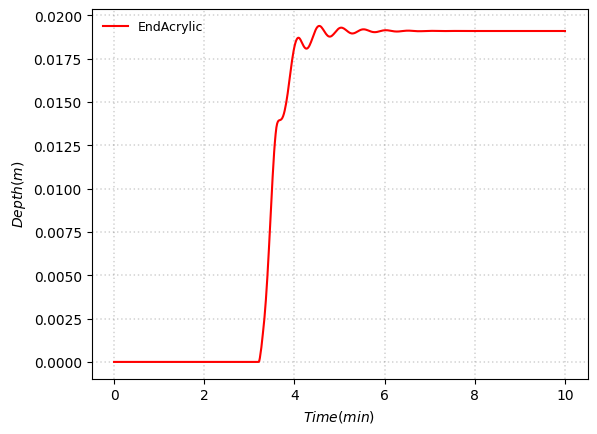

junction_inp_3.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01787763]])]


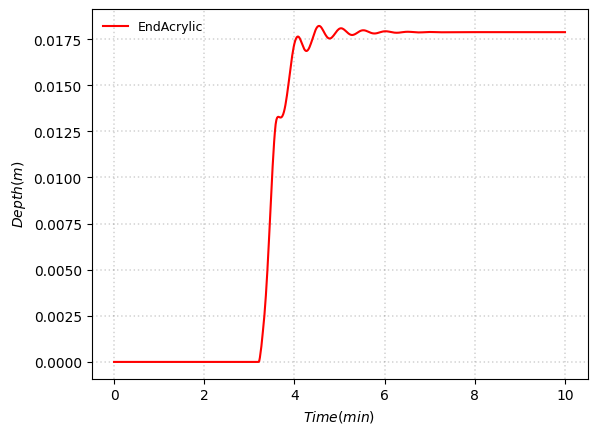

junction_inp_5.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01787763]])]


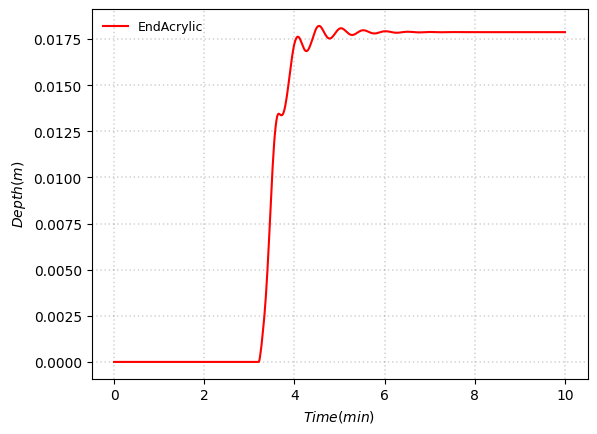

junction_inp_1.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01787763]])]


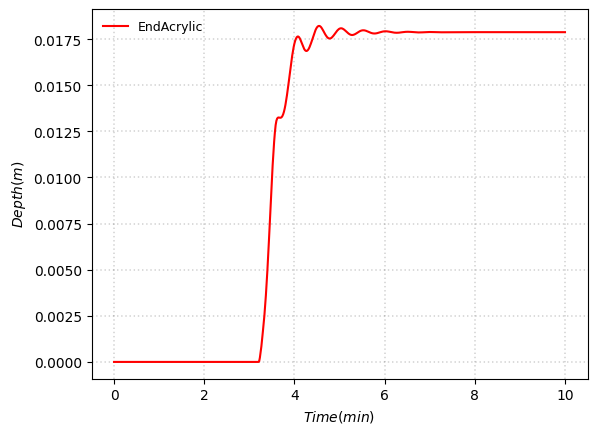

junction_inp_7.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01787763]])]


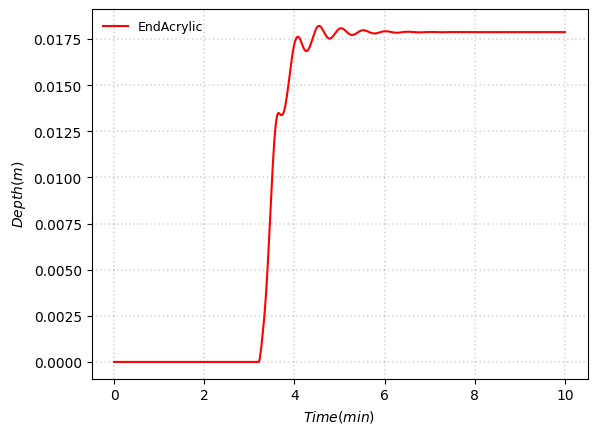

junction_inp_0.inp.out
[matrix([[0.01764445]]), matrix([[0.01764446]]), matrix([[0.01499727]]), matrix([[0.0237338]])]


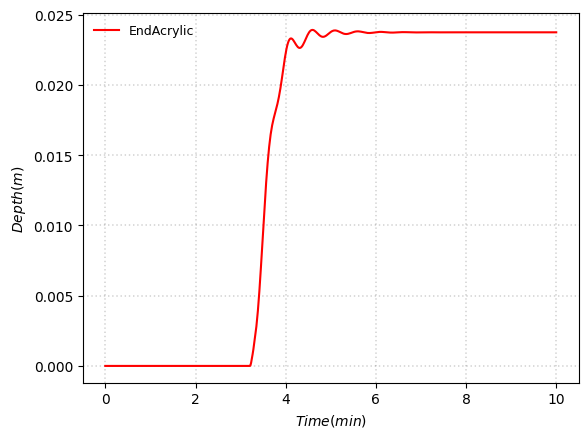

junction_inp_4.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01908826]])]


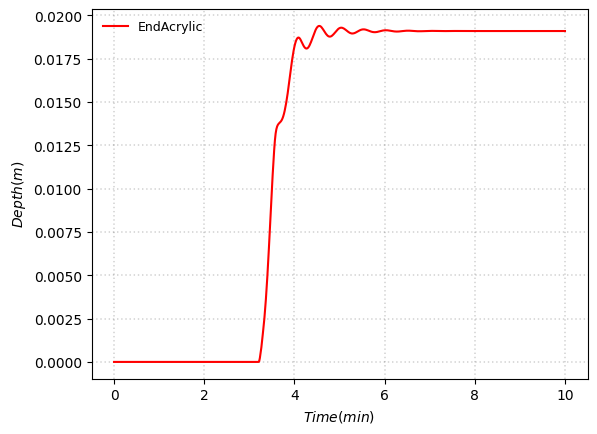

junction_inp_2.inp.out
[matrix([[0.01537034]]), matrix([[0.01537043]]), matrix([[0.01499726]]), matrix([[0.01908826]])]


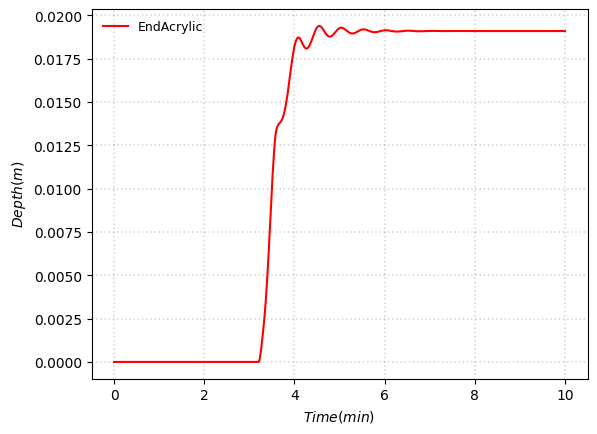

In [4]:
from swmm.toolkit.shared_enum import NodeAttribute
from pyswmm import Output
from datetime import datetime
import matplotlib.pyplot as plt
import sys




#from macpath import join
lista = []


# EndAcrylic
#list_of_files = glob.glob('./files/*.out') # files .out to be readed

list_of_files = glob.glob('*.out') # files .out to be readed  - by ruti

# print(list_of_files)

for file_name in list_of_files:
    print(file_name)
    with Output(file_name) as out:
        ts = out.node_series('EndAcrylic', NodeAttribute.INVERT_DEPTH)
        tl = out.node_series('SP_L', NodeAttribute.INVERT_DEPTH)
        tu = out.node_series('SP_U', NodeAttribute.INVERT_DEPTH)
        tJ = out.node_series('T_J', NodeAttribute.INVERT_DEPTH)
        size = 601
        time = matrix([float(0.0)]*size)
        HD = matrix([float(0.0)]*size)
        HDl = matrix([float(0.0)]*size)
        HDu = matrix([float(0.0)]*size)
        HDJ = matrix([float(0.0)]*size)

        i=1
        for index in ts:
           # print(index, ts[index])
            D = ts[index]
            Dl = tl[index]
            Du = tu[index]
            DJ = tJ[index]
            HD[0,i] = D
            HDl[0,i] = Dl
            HDu[0,i] = Du
            HDJ[0,i] = DJ

            i = i + 1
            # print(i)
    #___
    HD = np.transpose(HD)
    HDl = np.transpose(HDl)
    HDu = np.transpose(HDu)
    HDJ = np.transpose(HDJ)
    mediaHD= sum(HD[590:])/11
    mediaHDl= sum(HDl[590:])/11
    mediaHDu= sum(HDu[590:])/11
    mediaHDJ= sum(HDJ[590:])/11
    lista2= [mediaHDu,mediaHDl,mediaHD,mediaHDJ]
    print (lista2)
    #with open('arquivo2.txt','a') as arquivo:
    #    arquivo.write(str(lista) +'\n')
    #    lista_guardar = lista.append(arquivo)
       # print(lista_guardar)
    #
    with open('arquivo3.txt','a') as arquivo3:
        #out_arr = numpy.hstack((mediaHDu, mediaHDl, mediaHD))  #write, upstream, lateral and downstream
        #arquivo3.write(str(out_arr) + '\n')
        arquivo3.write(str(file_name)+ "   "+str(mediaHDu)+"  "+str(mediaHDl)+"  "+str(mediaHD)+"  "+str(mediaHDJ) +'\n')

    np.savetxt(str(file_name) + '.txt',HDu,fmt='%.5f')
    np.savetxt(str(file_name) + '.txt',HDl,fmt='%.5f')
    np.savetxt(str(file_name) + '.txt',HD,fmt='%.5f')
    np.savetxt(str(file_name) + '.txt',HDJ,fmt='%.5f')
    time = np.linspace(0,10,601)
    plt.plot(time,HDJ,color='red', label='EndAcrylic')
    plt.xlabel(r"$Time(min)$")
    plt.ylabel(r"$Depth(m)$")
    plt.grid(color='k', linestyle=(0, (5, 10)) , linewidth=0.2)
    plt.legend(frameon=False,loc='upper left', ncol=1,fontsize=9)
    plt.savefig(str(file_name) + ".pdf")
    plt.show()

    #print(lista_guardar)

In [ ]:
# cont = 0 # contador de arquivos
# n = 8 # numero de arquivos
# for i in range(n):
#     cont = cont + 1
#     print(cont)
#     print(f"junction_ini_{cont}.ini")
#     os.remove(f"junction_ini_{cont}.ini")
#     print(f"junction_inp_{cont}.inp")
#     os.remove(f"junction_inp_{cont}.inp")
#     print(f"junction_inp_{cont}.inp.out.pdf")
#     os.remove(f"junction_inp_{cont}.inp.out.pdf")
#     print(f"junction_inp_{cont}.inp.out")
#     os.remove(f"junction_inp_{cont}.inp.out")
#     print(f"junction_inp_{cont}.inp.out.txt")
#     os.remove(f"junction_inp_{cont}.inp.out.txt")
#     print(f"junction_inp_{cont}.inp.rpt")
#     os.remove(f"junction_inp_{cont}.inp.rpt")

# print("junction_inp_0.inp.out")
# os.remove(f"junction_inp_0.inp.out")
# print("junction_inp_0.inp.rpt")
# os.remove(f"junction_inp_0.inp.rpt")
# print("K_value.txt")
# os.remove(f"K_value.txt")
# print("output.txt")
# os.remove(f"output.txt")
# print("arquivo3.txt")
# os.remove(f"arquivo3.txt")
# os.remove(f"junction_inp_0.inp.out.pdf")
# print("junction_inp_0.inp.out.pdf")
# print("junction_inp_0.inp.out.txt")
# os.remove(f"junction_inp_0.inp.out.txt")